<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Project%232_Hybrid%20MNB-RNN%20%26%20RNN-MNB%20based%20on%20WSNBFSF%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multinomial Naive Bayes and Recurrent Neural Networks (RNNs) for 4 class classifications**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load dataset
dataset = pd.read_csv("dataset.csv")
dataset.isnull().sum()

Event             0
Time              0
S_Node            0
Node_id           0
Rest_Energy       0
Trace_Level       0
Mac_Type_Pckt     0
Source_IP_Port    0
Des_IP_Port       0
Packet_Size       0
TTL               0
Hop_Count         0
Broadcast_ID      0
Dest_Node_Num     0
Dest_Seq_Num      0
Src_Node_ID       0
Src_Seq_Num       0
Class             0
dtype: int64

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312106 entries, 0 to 312105
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Event           312106 non-null  int64  
 1   Time            312106 non-null  float64
 2   S_Node          312106 non-null  int64  
 3   Node_id         312106 non-null  int64  
 4   Rest_Energy     312106 non-null  float64
 5   Trace_Level     312106 non-null  int64  
 6   Mac_Type_Pckt   312106 non-null  int64  
 7   Source_IP_Port  312106 non-null  float64
 8   Des_IP_Port     312106 non-null  float64
 9   Packet_Size     312106 non-null  int64  
 10  TTL             312106 non-null  int64  
 11  Hop_Count       312106 non-null  int64  
 12  Broadcast_ID    312106 non-null  int64  
 13  Dest_Node_Num   312106 non-null  int64  
 14  Dest_Seq_Num    312106 non-null  int64  
 15  Src_Node_ID     312106 non-null  int64  
 16  Src_Seq_Num     312106 non-null  int64  
 17  Class     

### **Data Preprocessing**

In [4]:
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])
y = np_utils.to_categorical(y, num_classes=4)
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X.shape)
print(y.shape)

(312106, 17)
(312106, 4)


In [5]:
# Data preprocessing
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Hybrid RNN-MNB for 4 Class**

In [ ]:
# LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

history = model.fit(X_train_lstm, y_train, epochs=15, batch_size=64, validation_data=(X_test_lstm, y_test), verbose=1)

# Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, np.argmax(y_train, axis=1))

y_pred_mnb = mnb.predict(X_test)
y_pred_mnb = np_utils.to_categorical(y_pred_mnb, num_classes=4)

# Combine models
y_pred_lstm = model.predict(X_test_lstm)
y_pred_lstm = np.argmax(y_pred_lstm, axis=1)
y_pred_lstm = np_utils.to_categorical(y_pred_lstm, num_classes=4)

y_pred = y_pred_lstm * 0.4 + y_pred_mnb * 0.6
y_pred = np.argmax(y_pred, axis=1)

# Evaluation metrics
print(classification_report(np.argmax(y_test, axis=1), y_pred))
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 4)                 260       
                                                                 
Total params: 17,156
Trainable params: 17,156
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
13143/13143 [==============================] - 232s 17ms/step - loss: 0.3082 - accuracy: 0.8768 - val_loss: 0.2028 - val_accuracy: 0.9156
Epoch 2/15
13143/13143 [==============================] - 224s 17ms/step - loss: 0.1501 - accuracy: 0.9457 - val_loss: 0.1519 - val_accuracy: 0.9491
Epoch 3/15
13143/1

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Hybrid MNB-RNNs Model


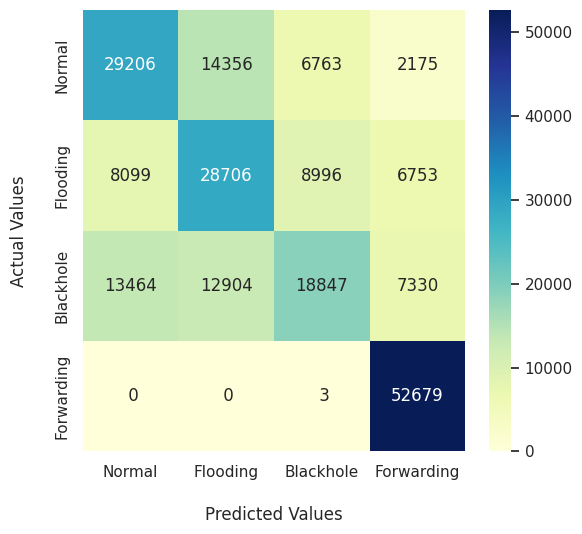

In [ ]:
print("Confusion Matrix of Hybrid MNB-RNNs Model") 
conf_mat(np.argmax(y_test, axis=1), y_pred)

In [ ]:
report = classification_report(np.argmax(y_test, axis=1), y_pred, output_dict=True)
detection_rates = {}
for cls in range(4):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']
print("Detection rates:", detection_rates)

Detection rates: {0: 0.5563047619047619, 1: 0.546219126993188, 2: 0.358683033590256, 3: 0.9999430545537376}


**Hybrid MNB-RNN for 4 Class**

In [7]:
# Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, np.argmax(y_train, axis=1))

y_pred_mnb = mnb.predict(X_test)
y_pred_mnb = np_utils.to_categorical(y_pred_mnb, num_classes=4)

# LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

history = model.fit(X_train_lstm, y_train, epochs=15, batch_size=64, validation_data=(X_test_lstm, y_test), verbose=1)

# Combine models
y_pred_lstm = model.predict(X_test_lstm)
y_pred_lstm = np.argmax(y_pred_lstm, axis=1)
y_pred_lstm = np_utils.to_categorical(y_pred_lstm, num_classes=4)

y_pred = y_pred_lstm * 0.4 + y_pred_mnb * 0.6
y_pred = np.argmax(y_pred, axis=1)

# Evaluation metrics
print(classification_report(np.argmax(y_test, axis=1), y_pred))
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 4)                 260       
                                                                 
Total params: 17,156
Trainable params: 17,156
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
13143/13143 [==============================] - 238s 18ms/step - loss: 0.3129 - accuracy: 0.8742 - val_loss: 0.1750 - val_accuracy: 0.9320
Epoch 2/15
13143/13143 [==============================] - 192s 15ms/step - loss: 0.1636 - accuracy: 0.9393 - val_loss: 0.1032 - val_accuracy: 0.9620
Epoch 3/15
13143/1

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Hybrid MNB-RNNs Model


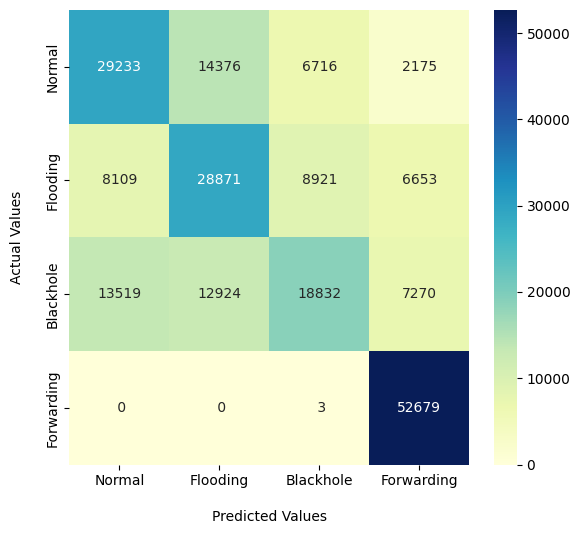

In [9]:
print("Confusion Matrix of Hybrid MNB-RNNs Model") 
conf_mat(np.argmax(y_test, axis=1), y_pred)

In [10]:
report = classification_report(np.argmax(y_test, axis=1), y_pred, output_dict=True)
detection_rates = {}
for cls in range(4):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']
print("Detection rates:", detection_rates)

Detection rates: {0: 0.5568190476190477, 1: 0.549358754804582, 2: 0.3583975639927681, 3: 0.9999430545537376}
